In [ ]:
import matplotlib.pyplot as plt # plotting library
import numpy as np # this module is useful to work with numerical arrays
import pandas as pd 
import random 
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader,random_split
from torch import nn
import torch.nn.functional as F
import torch.optim as optim

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
#load Dataset
def load_dataset():
    transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))])

    train_data_path = '/content/drive/MyDrive/Colab Notebooks/Hela_hw2/train'
    valid_data_path = '/content/drive/MyDrive/Colab Notebooks/Hela_hw2/validation'
    test_data_path = '/content/drive/MyDrive/Colab Notebooks/Hela_hw2/test'

    train_dataset = torchvision.datasets.ImageFolder(root=train_data_path,transform=torchvision.transforms.ToTensor())
    test_dataset = torchvision.datasets.ImageFolder(root=test_data_path,transform=torchvision.transforms.ToTensor())
    valid_dataset = torchvision.datasets.ImageFolder(root=valid_data_path,transform=torchvision.transforms.ToTensor())

    train_iterator = torch.utils.data.DataLoader(train_dataset,batch_size=32,num_workers=0,shuffle=True)
    test_iterator = torch.utils.data.DataLoader(test_dataset,batch_size=32,num_workers=0,shuffle=True)
    valid_iterator = torch.utils.data.DataLoader(valid_dataset,batch_size=32,num_workers=0,shuffle=True)
    
    return train_iterator, test_iterator, valid_iterator  

In [ ]:
# class VariationalEncoder(nn.Module):
#     def __init__(self, latent_dims):  
#         super(VariationalEncoder, self).__init__()
#         self.conv1 = nn.Conv2d(3, 8, 1, stride=2, padding=1)
#         print("pass1a")
#         self.conv2 = nn.Conv2d(8, 16, 3, stride=2, padding=1)
#         print("pass2a")
#         self.batch2 = nn.BatchNorm2d(16)
#         print("pass2b")
#         self.conv3 = nn.Conv2d(16, 32, 3, stride=2, padding=0)  
#         print("pass3a")
#         self.linear1 = nn.Linear(3*3*32, 128)
#         print("pass3b")
#         self.linear2 = nn.Linear(128, latent_dims)
#         print("pass4a")
#         self.linear3 = nn.Linear(128, latent_dims)
#         print("pass5")

#         self.N = torch.distributions.Normal(0, 1)
#         self.N.loc = self.N.loc.cuda() # hack to get sampling on the GPU
#         self.N.scale = self.N.scale.cuda()
#         self.kl = 0

#     def forward(self, x):
#         x = x.to(device)
#         x = F.relu(self.conv1(x))
#         print("pass1")
#         x = F.relu(self.batch2(self.conv2(x)))
#         print("pass2")
#         x = F.relu(self.conv3(x))
#         print("pass3")
#         x = torch.flatten(x, start_dim=1)
#         print("pass5")
#         x = F.relu(self.linear1(x))
#         print("pass6")
#         mu =  self.linear2(x)
#         sigma = torch.exp(self.linear3(x))
#         z = mu + sigma*self.N.sample(mu.shape)
#         self.kl = (sigma**2 + mu**2 - torch.log(sigma) - 1/2).sum()
#         return z      

In [ ]:
# class Decoder(nn.Module):
    
#     def __init__(self, latent_dims):
#         super().__init__()

#         self.decoder_lin = nn.Sequential(
#             nn.Linear(latent_dims, 128),
#             nn.ReLU(True),
#             nn.Linear(128, 3 * 3 * 32),
#             nn.ReLU(True)
#         )

#         self.unflatten = nn.Unflatten(dim=1, unflattened_size=(32, 3, 3))

#         self.decoder_conv = nn.Sequential(
#             nn.ConvTranspose2d(32, 16, 3, stride=2, output_padding=0),
#             nn.BatchNorm2d(16),
#             nn.ReLU(True),
#             nn.ConvTranspose2d(16, 8, 3, stride=2, padding=1, output_padding=1),
#             nn.BatchNorm2d(8),
#             nn.ReLU(True),
#             nn.ConvTranspose2d(8, 1, 3, stride=2, padding=1, output_padding=1)
#         )
        
#     def forward(self, x):
#         x = self.decoder_lin(x)
#         x = self.unflatten(x)
#         x = self.decoder_conv(x)
#         x = torch.sigmoid(x)
#         return x

In [ ]:
# class VariationalAutoencoder(nn.Module):
#     def __init__(self, latent_dims):
#         super(VariationalAutoencoder, self).__init__()
#         self.encoder = VariationalEncoder(latent_dims)
#         self.decoder = Decoder(latent_dims)

#     def forward(self, x):
#         x = x.to(device)
#         z = self.encoder(x)
#         return self.decoder(z)

In [ ]:
# class varAuto(nn.Module):
 
#     def __init__(self, input_dim, z_dim, h_dim):
#         super().__init__()
#         # encoder
#         self.img_2hid = nn.Linear(input_dim, h_dim)

#         # one for mu and one for stds, note how we only output
#         # diagonal values of covariance matrix. Here we assume
#         # the pixels are conditionally independent 
#         self.hid_2mu = nn.Linear(h_dim, z_dim)
#         self.hid_2sigma = nn.Linear(h_dim, z_dim)

#         # decoder
#         self.z_2hid = nn.Linear(z_dim, h_dim)
#         self.hid_2img = nn.Linear(h_dim, input_dim)

#     def encode(self, x):
#         h = F.relu(self.img_2hid(x))
#         mu = self.hid_2mu(h)
#         sigma = self.hid_2sigma(h)
#         return mu, sigma

#     def decode(self, z):
#         new_h = F.relu(self.z_2hid(z))
#         x = torch.sigmoid(self.hid_2img(new_h))
#         return x

#     def forward(self, x):
#         mu, sigma = self.encode(x)

#         # Sample from latent distribution from encoder
#         epsilon = torch.randn_like(sigma)
#         z_reparametrized = mu + sigma*epsilon

#         x = self.decode(z_reparametrized)
#         return x, mu, sigma

In [ ]:
# torch.manual_seed(0)
# import torch
# torch.cuda.is_available()
# INPUT_DIM = 512
# Z_DIM = 20
# H_DIM = 200
# d = 20
# device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
# print(f'Selected device: {device}')
# vae = VariationalAutoencoder(latent_dims=d)
# vae2 = varAuto(512, 20, 200)

# lr = 0.01

# optim = torch.optim.Adam(vae.parameters(), lr=lr, weight_decay=1e-5)
# optim2 = torch.optim.Adam(vae2.parameters(), lr=lr, weight_decay=1e-5)
# vae.to(device)
# vae2.to(device)

Selected device: cuda
pass1a
pass2a
pass2b
pass3a
pass3b
pass4a
pass5


varAuto(
  (img_2hid): Linear(in_features=512, out_features=200, bias=True)
  (hid_2mu): Linear(in_features=200, out_features=20, bias=True)
  (hid_2sigma): Linear(in_features=200, out_features=20, bias=True)
  (z_2hid): Linear(in_features=20, out_features=200, bias=True)
  (hid_2img): Linear(in_features=200, out_features=512, bias=True)
)

In [ ]:
# ### Training function
# def train_epoch(vae, device, dataloader, optimizer):
#     # Set train mode for both the encoder and the decoder
#     vae.train()
#     train_loss = 0.0
#     # Iterate the dataloader (we do not need the label values, this is unsupervised learning)
#     for x, _ in dataloader: 
#         # Move tensor to the proper device
#         x = x.to(device)
#         x_hat, mu, sigma = vae(x)
#         # Evaluate loss
#         loss = ((x - x_hat)**2).sum()
#         kl_div = - torch.sum(1 + torch.log(sigma.pow(2)) - mu.pow(2) - sigma.pow(2))
#         loss = loss+kl_div


#         # Backward pass
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
#         # Print batch loss
#         print('\t partial train loss (single batch): %f' % (loss.item()))
#         train_loss+=loss.item()

#     return train_loss / len(dataloader.dataset)

In [ ]:
# ### Testing function
# def test_epoch(vae, device, dataloader, optim2):
#     # Set evaluation mode for encoder and decoder
#     vae.eval()
#     val_loss = 0.0
#     with torch.no_grad(): # No need to track the gradients
#         for x, _ in dataloader:
#             # Move tensor to the proper device
#             x = x.to(device)
#             # Encode data
#             # encoded_data = vae.encoder(x)
#             # Decode data
#             x_hat, mu, sigma = vae(x)
#             loss = ((x - x_hat)**2).sum()
#             kl_div = - torch.sum(1 + torch.log(sigma.pow(2)) - mu.pow(2) - sigma.pow(2))
#             loss = loss+kl_div
#             val_loss += loss.item()

#     return val_loss / len(dataloader.dataset)

In [ ]:
train_loader, test_loader, valid_loader = load_dataset()

In [ ]:

# def plot_ae_outputs(encoder,decoder,n=10):
#     plt.figure(figsize=(16,4.5))
#     targets = test_dataset.targets.numpy()
#     t_idx = {i:np.where(targets==i)[0][0] for i in range(n)}
#     for i in range(n):
#       ax = plt.subplot(2,n,i+1)
#       img = test_dataset[t_idx[i]][0].unsqueeze(0).to(device)
#       encoder.eval()
#       decoder.eval()
#       with torch.no_grad():
#          rec_img  = decoder(encoder(img))
#       plt.imshow(img.cpu().squeeze().numpy(), cmap='gist_gray')
#       ax.get_xaxis().set_visible(False)
#       ax.get_yaxis().set_visible(False)  
#       if i == n//2:
#         ax.set_title('Original images')
#       ax = plt.subplot(2, n, i + 1 + n)
#       plt.imshow(rec_img.cpu().squeeze().numpy(), cmap='gist_gray')  
#       ax.get_xaxis().set_visible(False)
#       ax.get_yaxis().set_visible(False)  
#       if i == n//2:
#          ax.set_title('Reconstructed images')
#     plt.show()  

In [ ]:
# class vA(nn.Module):
#   def __init__(self):
#     super(VariationalAutoencoder, self).__init__()
#     self.encoder = nn.Sequential(nn.Conv2d(3, 6, kernel_size = 2,stride = 1),
#     nn.ReLU(True),nn.Conv2d(6,12, kernel_size =2, stride =1), nn.ReLU(True),
#     nn.Conv2d(12, 24, kernel_size = 2, stride =1), nn.ReLU(True)
#     )
    
#     self.decoder = nn.Sequential(nn.ConvTranspose2d(24, 12, kernel_size = 2, stride =1),
#     nn.ReLU(True),
#     nn.ConvTranspose2d(12, 6, kernel_size = 2, stride =1), nn.ReLU(True),
#     nn.ConvTranspose2d(6,3, kernel_size =2, stride = 1), nn.ReLU(True), nn.Tanh()
#     )
#   def forward(self,x):
#     x1 = self.encoder(x)
#     x2 = self.decoder(x1)
#     return x2, x1

In [ ]:
num_epochs = 20
criterion = nn.CrossEntropyLoss()

for epoch in range(num_epochs):
   train_loss = train_epoch(vae2,device,train_loader,optim2)
   val_loss = test_epoch(vae2,device,valid_loader, optim2)
   print('\n EPOCH {}/{} \t train loss {:.3f} \t val loss {:.3f}'.format(epoch + 1, num_epochs,train_loss,val_loss))
  #  plot_ae_outputs(vae.encoder,vae.decoder,n=10)

	 partial train loss (single batch): 5295513.000000
	 partial train loss (single batch): 4860259.000000
	 partial train loss (single batch): 4560619.000000
	 partial train loss (single batch): 4314731.500000
	 partial train loss (single batch): 4347328.000000
	 partial train loss (single batch): 4147861.000000
	 partial train loss (single batch): 3651265.250000
	 partial train loss (single batch): 3809716.500000
	 partial train loss (single batch): 1876841.250000

 EPOCH 1/20 	 train loss 134540.637 	 val loss 110461.220


NameError: ignored

<Figure size 1152x324 with 0 Axes>

In [ ]:
# def show_image(img):
#     npimg = img.numpy()
#     plt.imshow(np.transpose(npimg, (1, 2, 0)))


# vae.eval()

# with torch.no_grad():

#     # sample latent vectors from the normal distribution
#     latent = torch.randn(128, d, device=device)

#     # reconstruct images from the latent vectors
#     img_recon = vae.decoder(latent)
#     img_recon = img_recon.cpu()

#     fig, ax = plt.subplots(figsize=(20, 8.5))
#     show_image(torchvision.utils.make_grid(img_recon.data[:100],10,5))
#     plt.show()

In [ ]:
# encoded_samples = []
# for sample in tqdm(test_dataset):
#     img = sample[0].unsqueeze(0).to(device)
#     label = sample[1]
#     # Encode image
#     vae.eval()
#     with torch.no_grad():
#         encoded_img  = vae.encoder(img)
#     # Append to list
#     encoded_img = encoded_img.flatten().cpu().numpy()
#     encoded_sample = {f"Enc. Variable {i}": enc for i, enc in enumerate(encoded_img)}
#     encoded_sample['label'] = label
#     encoded_samples.append(encoded_sample)
    
# encoded_samples = pd.DataFrame(encoded_samples)
# encoded_samples


# from sklearn.manifold import TSNE
# import plotly.express as px

# px.scatter(encoded_samples, x='Enc. Variable 0', y='Enc. Variable 1', color=encoded_samples.label.astype(str), opacity=0.7)


The working code

cpu
| Epoch: 1 | Train Loss: 1862869.4583 | Valid Loss : 536198.5820 | Time: 22
| Epoch: 2 | Train Loss: 528911.6441 | Valid Loss : 95857.2012 | Time: 11
| Epoch: 3 | Train Loss: 117139.1762 | Valid Loss : 53971.7646 | Time: 13
| Epoch: 4 | Train Loss: 78027.1853 | Valid Loss : 40321.1011 | Time: 11
| Epoch: 5 | Train Loss: 43029.8435 | Valid Loss : 17221.6711 | Time: 11
| Epoch: 6 | Train Loss: 24756.1348 | Valid Loss : 9915.9050 | Time: 11
| Epoch: 7 | Train Loss: 14511.5751 | Valid Loss : 7026.9924 | Time: 11
| Epoch: 8 | Train Loss: 9177.7824 | Valid Loss : 4460.0487 | Time: 13
| Epoch: 9 | Train Loss: 6710.9187 | Valid Loss : 2847.3044 | Time: 11
| Epoch: 10 | Train Loss: 4774.5601 | Valid Loss : 2101.5024 | Time: 11
| Epoch: 11 | Train Loss: 3574.7516 | Valid Loss : 1660.3319 | Time: 12
| Epoch: 12 | Train Loss: 2781.8806 | Valid Loss : 1332.9543 | Time: 11
| Epoch: 13 | Train Loss: 2338.5387 | Valid Loss : 1150.9324 | Time: 11
| Epoch: 14 | Train Loss: 2024.3977 | Valid Loss : 9

<ipython-input-9-9aba392eac76>:276: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3277.)
  print(plt.imshow(image.T.cpu().data.numpy()))


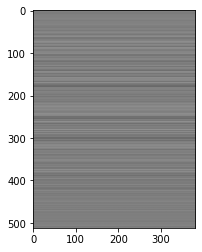

In [ ]:
# -*- coding: utf-8 -*-
"""q2

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1Cc70UuyqJN4ZrXe8UFDYow4hO7K5Q4my
"""

from IPython.utils.py3compat import encode
#Autoencoder

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets

import os
import random
import numpy as np
import argparse
import sys
import time

SEED = 1234

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

def load_dataset():
    transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))])

    train_data_path = '/content/drive/MyDrive/Colab Notebooks/Hela_hw2/train'
    valid_data_path = '/content/drive/MyDrive/Colab Notebooks/Hela_hw2/validation'
    test_data_path = '/content/drive/MyDrive/Colab Notebooks/Hela_hw2/test'

    train_dataset = torchvision.datasets.ImageFolder(root=train_data_path,transform=torchvision.transforms.ToTensor())
    test_dataset = torchvision.datasets.ImageFolder(root=test_data_path,transform=torchvision.transforms.ToTensor())
    valid_dataset = torchvision.datasets.ImageFolder(root=valid_data_path,transform=torchvision.transforms.ToTensor())

    train_iterator = torch.utils.data.DataLoader(train_dataset,batch_size=32,num_workers=0,shuffle=True)
    test_iterator = torch.utils.data.DataLoader(test_dataset,batch_size=32,num_workers=0,shuffle=True)
    valid_iterator = torch.utils.data.DataLoader(valid_dataset,batch_size=32,num_workers=0,shuffle=True)
    
    return train_iterator, test_iterator, valid_iterator      

def train(model, device, iterator, optimizer, criterion):
    
    epoch_loss = 0
    
    model.train()
    
    for (x, y) in iterator:
        
        x = x.to(device)
        # x = x.reshape(-1, 512*382)
        optimizer.zero_grad()
            
        fx, mu, sigma = model(x)
        
        loss = criterion(fx, x)
        kl_div = - torch.sum(1 + torch.log(sigma.pow(2)) - mu.pow(2) - sigma.pow(2))
        loss = loss+kl_div
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        
    return epoch_loss / len(iterator)  

def evaluate(model, device, iterator, criterion):
    epoch_loss, l = 0, 0
    epoch_acc, a = 0, 0
    epoch_lossList = []
    epoch_accList = []
    counter =0
    
    model.eval()
    
    with torch.no_grad():
        for (x, y) in iterator:

            x = x.to(device)
            y = y.to(device)

            fx, mu, sigma = model(x)
            result = (fx, x)

            loss = criterion(fx, x)
            kl_div = - torch.sum(1 + torch.log(sigma.pow(2)) - mu.pow(2) - sigma.pow(2))
            loss = loss+kl_div
            #acc = calculate_accuracy(fx, y)

            epoch_loss += loss.item()
            #epoch_acc += acc.item()
            
            l = epoch_loss / len(iterator)
            #a = epoch_acc / len(iterator)
            counter +-1
            if counter %10 ==0:
              epoch_lossList.append(l)
              #epoch_accList.append(a)
            
    return l, result, epoch_lossList


#not used but was tested
class VariationalAutoencoder(nn.Module):
  def __init__(self):
    super(VariationalAutoencoder, self).__init__()
    self.encoder = nn.Sequential(nn.Conv2d(3, 6, kernel_size = 2,stride = 1),
    nn.ReLU(True),nn.Conv2d(6,12, kernel_size =2, stride =1), nn.ReLU(True),
    nn.Conv2d(12, 24, kernel_size = 2, stride =1), nn.ReLU(True)
    )
    
    self.decoder = nn.Sequential(nn.ConvTranspose2d(24, 12, kernel_size = 2, stride =1),
    nn.ReLU(True),
    nn.ConvTranspose2d(12, 6, kernel_size = 2, stride =1), nn.ReLU(True),
    nn.ConvTranspose2d(6,3, kernel_size =2, stride = 1), nn.ReLU(True), nn.Tanh()
    )
  def forward(self,x):
    x1 = self.encoder(x)
    x2 = self.decoder(x1)
    return x2, x1

#used and tested, that showed promise if the epoch size and network depth were to be increased
class VariationalAutoencoder1(nn.Module):
 
    def __init__(self, input_dim, z_dim, h_dim):
        super().__init__()
        # encoder
        # self.a = nn.Conv2d(3, 6, kernel_size = 2,stride = 1)
        # self.b = nn.Conv2d(6,12, kernel_size =2, stride =1)
        # self.c = nn.Conv2d(12,24, kernel_size =2, stride =1)
        self.img_2hid = nn.Linear(input_dim, h_dim)

        # one for mu and one for stds, note how we only output
        # diagonal values of covariance matrix. Here we assume
        # the pixels are conditionally independent 
        self.hid_2mu = nn.Linear(h_dim, z_dim)
        self.hid_2sigma = nn.Linear(h_dim, z_dim)

        # decoder
        # self.a2= nn.Sequential(nn.ConvTranspose2d(24, 12, kernel_size = 2, stride =1), nn.ReLU(True))
        # self.b2 = nn.Sequential(nn.ConvTranspose2d(12, 6, kernel_size = 2, stride =1), nn.ReLU(True))
        # self.c2 = nn.Sequential(nn.ConvTranspose2d(6,3, kernel_size =2, stride = 1))
        self.z_2hid = nn.Linear(z_dim, h_dim)
        self.hid_2img = nn.Linear(h_dim, input_dim)

    def encode(self, x):
        h = F.relu(self.img_2hid(x))
        mu = self.hid_2mu(h)
        sigma = self.hid_2sigma(h)
        return mu, sigma

    def decode(self, z):
        new_h = F.relu(self.z_2hid(z))
        x = torch.sigmoid(self.hid_2img(new_h))
        return x

    def forward(self, x):
        mu, sigma = self.encode(x)

        # Sample from latent distribution from encoder
        epsilon = torch.randn_like(sigma)
        z_reparametrized = mu + sigma*epsilon

        x = self.decode(z_reparametrized)
        return x, mu, sigma

train_iterator, test_iterator, valid_iterator= load_dataset()   
    
                    
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)


model = VariationalAutoencoder1(512, 20, 200).to(device)

optimizer = optim.Adam(model.parameters(), lr=0.01)


criterion = torch.nn.CrossEntropyLoss()

load_checkpoint, skip_train = False, False

#You are recommended to store check points
if len(sys.argv) > 1:
    if sys.argv[1] == "c":
        load_checkpoint = True
    elif sys.argv[1] == "s":
        skip_train = True  #Proceed directly to testing


### Training ###
EPOCHS = 100 #A hint just for people using CPUs to train: 5 epoch (~2min/epoch on cpu) is enough in many cases.
SAVE_DIR = 'models'
SAVE_PATH = os.path.join(SAVE_DIR, " var autoencoder.pt")

if not os.path.isdir(SAVE_DIR):
    os.makedirs(SAVE_DIR)

if load_checkpoint:
    checkpoint = torch.load(SAVE_PATH)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    epoch = checkpoint['epoch']
    loss = checkpoint['loss']




if not skip_train:
    time_curr = time.time()
    best_val_loss = float('inf')
    for epoch in range(EPOCHS):
        
        train_loss = train(model, device, train_iterator, optimizer, criterion)
        valid_loss, vResult, vList = evaluate(model, device, valid_iterator, criterion)

        if valid_loss < best_val_loss:
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                }, SAVE_PATH)
            best_val_loss = valid_loss
    
        print('| Epoch: {0:d} | Train Loss: {1:.4f} | Valid Loss : {2:.4f} | Time: {3:d}'.format(epoch+1, 
            train_loss, valid_loss, int(time.time() - time_curr)))
        time_curr = time.time()
    
    
checkpoint = torch.load(SAVE_PATH)
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']

model.eval()

#PLEASE IMPLEMENT YOUR TESTING HERE
test_loss, tResult, tList = evaluate(model, device, test_iterator, criterion)
print('| Test Loss: {0:.3f} |'.format(test_loss))

def imageGeneration(iterator, result):
  dict1 = {}
  dict2 = {}
  fx, x = result
  for i, (x,y) in enumerate(iterator):
    print("Y:", y)
    print("x SIZE:", x.size())

    x = x.to(device)
    y = y.to(device)
    # print("shape of y:",y.size())
    # print("shape of x:", x.size())
    dict1[y][i]= x
    dict2[y][i] = fx

  return dict1, dict2

### Testing ### 
fx,x = tResult
import matplotlib.pyplot as plt

print(fx.size())
print(x.size())
image = (x[27])
image2 = (fx[27])
print(plt.imshow(image.T.cpu().data.numpy()))

plt.gray()
print(plt.imshow(image2.T.cpu().data.numpy(), cmap = 'gray'))



torch.Size([28, 3, 382, 512])
torch.Size([28, 3, 382, 512])
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)


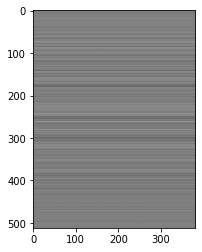

In [ ]:
print(fx.size())
print(x.size())
image = (x[25])
image2 = (fx[25])
print(plt.imshow(image.T.cpu().data.numpy()))

plt.gray()
print(plt.imshow(image2.T.cpu().data.numpy(), cmap = 'gray'))